In [3]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df = df.dropna(subset = ["Salary"])

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [5]:
knn_model.n_neighbors

5

In [8]:
y_pred = knn_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [10]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


Model Tuning

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
knn_params = {'n_neighbors':np.arange(1,30,1)}

In [13]:
knn = KNeighborsRegressor()

In [14]:
knn_cv_model = GridSearchCV(knn,knn_params, cv = 10)

In [15]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [16]:
knn_cv_model.best_params_["n_neighbors"]

8

In [17]:
knn_tuned  = KNeighborsRegressor(knn_cv_model.best_params_["n_neighbors"])

In [18]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [19]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test)))

413.7094731463598

# SVR

In [29]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df = df.dropna(subset = ["Salary"])

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                     random_state=42)

In [6]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])


In [7]:
from sklearn.svm import SVR

In [10]:
svr_model = SVR(kernel = "linear").fit(X_train,y_train)

In [11]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [12]:
# model denklemi
print("y = {0} + {1} x".format(svr_model.intercept_[0],
                              svr_model.coef_[0][0]))

y = -48.6975609756109 + 4.969512195121865 x


In [13]:
y_pred = svr_model.predict(X_train)

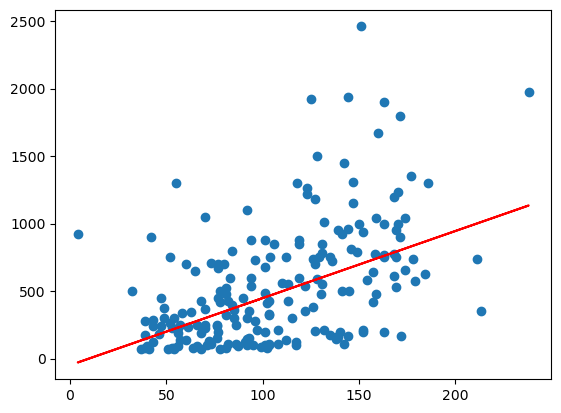

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color= "r")

In [16]:
svr_model.predict([[91]])

array([403.52804878])

In [17]:
y_pred = svr_model.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test,y_pred))

459.01879603651554

In [20]:
svr_model.unused_param


'random_state'

In [30]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=10).fit(X_train, y_train)

In [22]:
svr_cv_model.best_params_

{'C': 0.1}

In [25]:
svr_tuned = SVR(kernel = "linear",
               C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)


In [26]:
y_pred = svr_tuned.predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_test ,y_pred))

458.19896678111655